In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("data.xlsx")

In [7]:
df

,link,username,comment,insta_block,community_category_opp,community_category_neutral,community_category_progov,community_type_news,community_type_politics,community_type_celebrities,progov_trolling_number,comments_number,progov_trolling_level
0,https://www.instagram.com/p/CaiTKVxqAaE/,mansard_shop,"@unreal.nickname ну, если мы говорим про Итали...",0,1,0,0,1,0,0,0,34,0.0
1,https://www.instagram.com/p/CajjoU0INNm/,mansard_shop,@pianowine https://youtu.be/wUM1pVUXzAQ посмотри,0,1,0,0,1,0,0,0,141,0.0
2,https://www.instagram.com/p/CajkPs7KKV8/,baudelaire.hub.kh,Докса как феникс 👏❤️,0,1,0,0,1,0,0,0,5,0.0
3,https://www.instagram.com/p/CajnVHJqJUK/,imaryaana,А где колонна?),0,1,0,0,1,0,0,0,42,0.0
4,https://www.instagram.com/p/Cajn0vRqT-R/,_herzensschatzi,"Непридуманные истории, о которых невозможно мо...",0,1,0,0,1,0,0,0,17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,https://www.instagram.com/p/ChCk5nTjxTT/,exit_from_matrix999,💪💪💪👍✊,1,0,0,1,0,0,1,15,504,1.5
780,https://www.instagram.com/reel/ChcwYkSj2pN/,willtalya,❤️❤️❤️❤️❤️,1,0,0,1,0,0,1,118,2869,11.8
781,https://www.instagram.com/reel/ChmQx-EARJM/,kristinatisa,Ты гордость России! У тебя просто невероятное ...,1,0,0,1,0,0,1,66,1634,6.6
782,https://www.instagram.com/p/ChnVzj4AVmn/,reznik_ai23,Гимн убийц,1,0,0,1,0,0,1,29,875,2.9


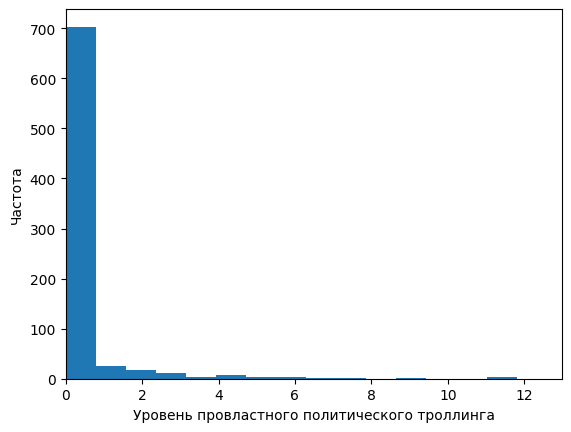

In [4]:
plt.hist(df['progov_trolling_level'], bins=15)

# Добавление подписей к осям и заголовка
plt.xlabel('Уровень провластного политического троллинга')
plt.ylabel('Частота')

# Настройка осей
plt.xlim(0, df['progov_trolling_level'].max() * 1.1)  # Увеличиваем пределы оси x для лучшего отображения аномалий

# Показ графика
plt.show()

In [8]:
# Вычисление среднего
mean_value = df['progov_trolling_level'].mean()

# Вычисление дисперсии
variance_value = df['progov_trolling_level'].var()

print(f'Среднее: {mean_value}')
print(f'Дисперсия: {variance_value}')

Среднее: 0.3956632653061225
Дисперсия: 1.4895852555581621


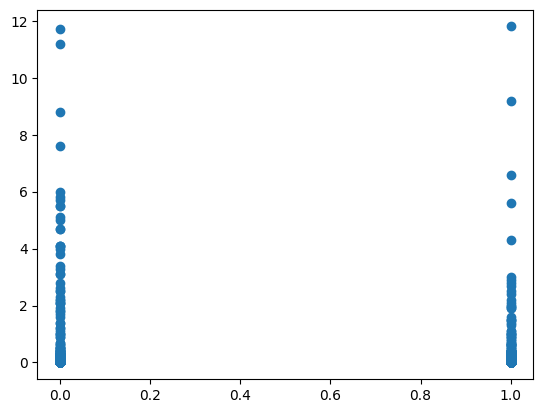

In [22]:
plt.scatter(df.insta_block, df.progov_trolling_level)

In [36]:
df['insta_block'].value_counts().to_frame().T.reindex(columns=[0, 1])

insta_block,0,1
count,372,412


In [22]:
import statsmodels.api as sm

In [25]:
y = df.progov_trolling_level
X = df[['insta_block', 'community_category_opp', 'community_category_progov', 'community_type_news', 'community_type_politics']]
X = sm.add_constant(X)

In [26]:
import statsmodels.formula.api as smf

In [27]:
# ПУАССОН
mod = smf.glm(formula="progov_trolling_level ~ community_type_news + community_type_politics + community_category_progov + insta_block*community_category_opp", data=df, family=sm.families.Poisson())
res = mod.fit(cov_type='HC3')
print(res.summary().as_text())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     progov_trolling_level   No. Observations:                  784
Model:                               GLM   Df Residuals:                      777
Model Family:                    Poisson   Df Model:                            6
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -445.15
Date:                   Fri, 28 Jun 2024   Deviance:                       416.42
Time:                           05:55:29   Pearson chi2:                     951.
No. Iterations:                        7   Pseudo R-squ. (CS):             0.5799
Covariance Type:                     HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [28]:
# Определяем формулу
formula = "progov_trolling_level ~ community_type_news + community_type_politics + community_category_progov + insta_block * community_category_opp"
mod_poisson = smf.glm(formula=formula, data=df, family=sm.families.Poisson()).fit()
alpha = mod_poisson.pearson_chi2 / mod_poisson.df_resid

# ОТРИЦАТЕЛЬНАЯ БИНОМИАЛЬНАЯ
mod_nb = smf.glm(formula=formula, data=df, family=sm.families.NegativeBinomial(alpha=alpha))
res_nb = mod_nb.fit(cov_type='HC3')
print(res_nb.summary().as_text())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     progov_trolling_level   No. Observations:                  784
Model:                               GLM   Df Residuals:                      777
Model Family:           NegativeBinomial   Df Model:                            6
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -446.86
Date:                   Fri, 28 Jun 2024   Deviance:                       219.67
Time:                           05:55:29   Pearson chi2:                     683.
No. Iterations:                        8   Pseudo R-squ. (CS):             0.3962
Covariance Type:                     HC3                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------